<center>

# **Sentiment Analysis Tweet Pada Tayangan Televisi, Menggunakan NLP dan KNN**

**Gabriella Fani SM (A11.2022.14441) - 4701**

Menganalisis sentimen tweet penonton terhadap program televisi dengan menggunakan teknik Natural Language Processing (NLP). Hasil dari analisis ini akan membantu pembuat program televisi memahami opini penonton secara lebih mendalam, mengidentifikasi elemen-elemen program yang disukai atau kurang disukai, dan memberikan masukan untuk meningkatkan kualitas tayangan berdasarkan feedback dari penonton.
</center>



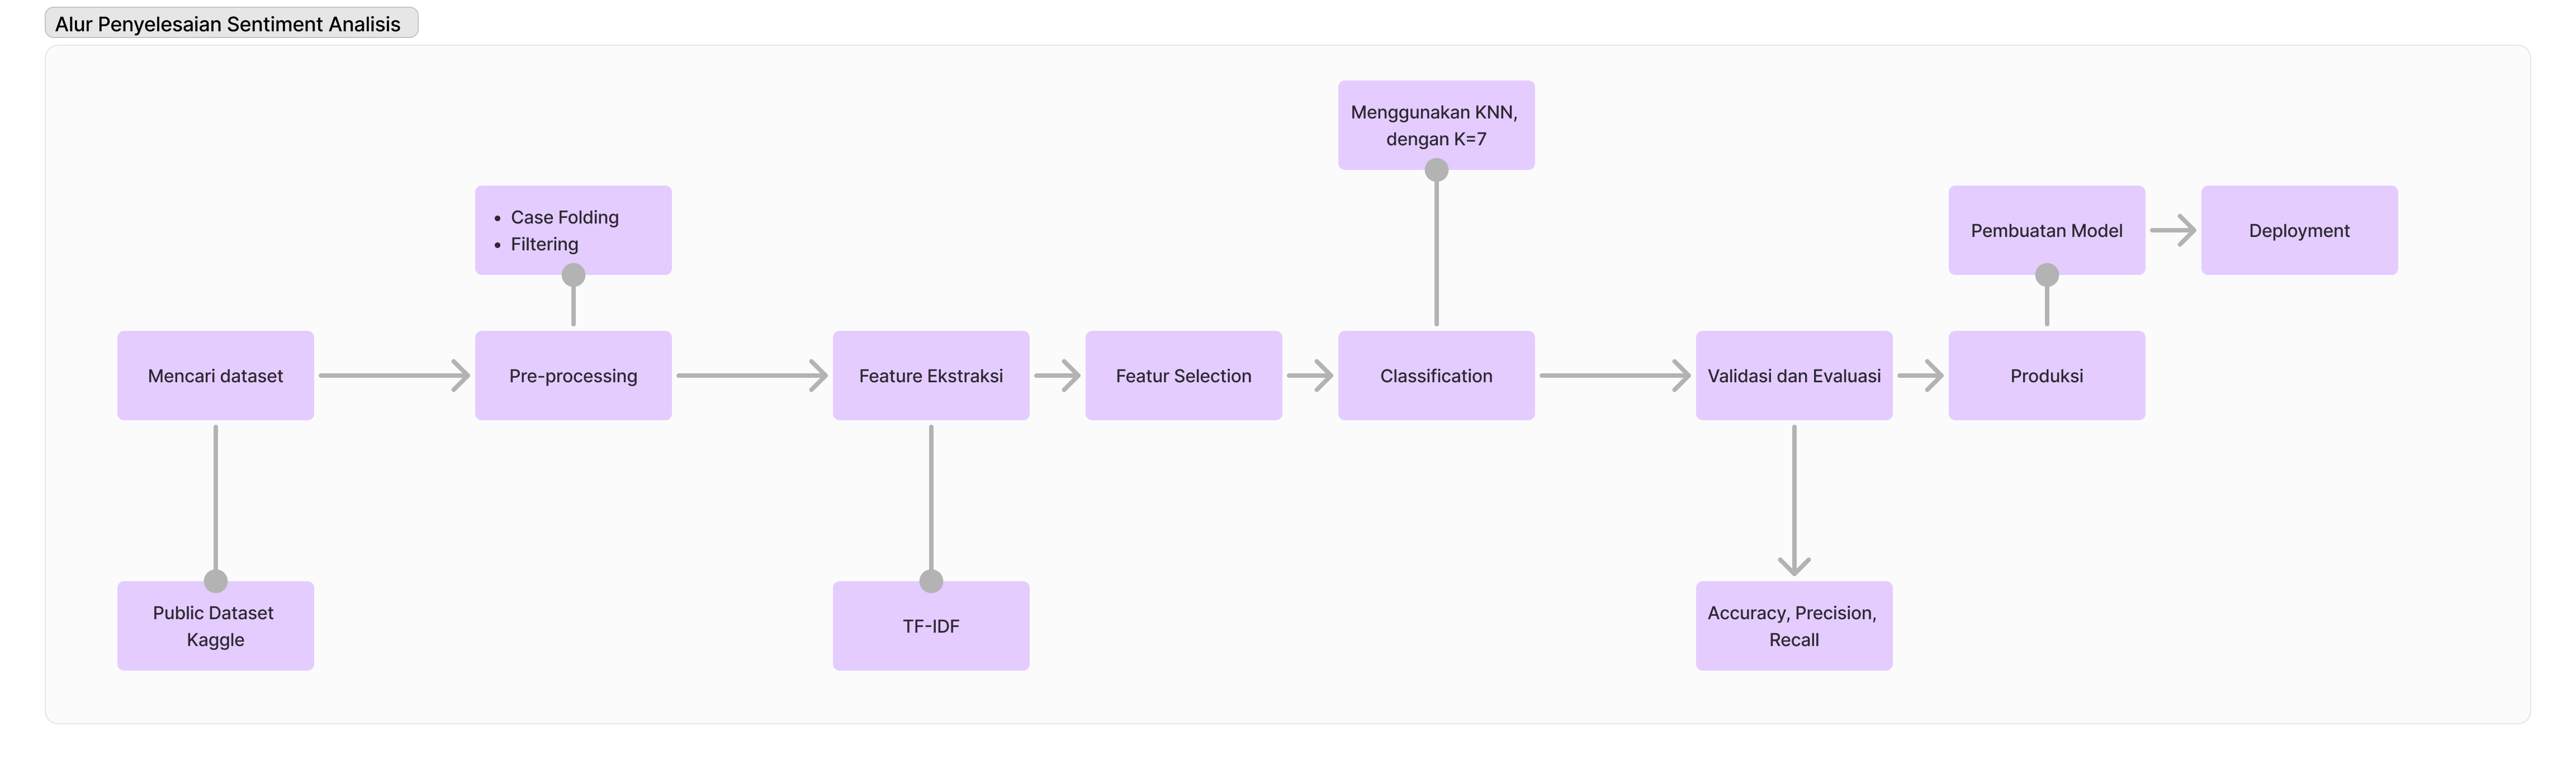

<center>

### **Pre Processing Data**
</center>

**Import Library**

In [1]:
import string
import pandas as pd
import numpy as np

**Import Dataset**

Dataset diambil dari kaggle

membaca file CSV berisi data tweet dan sentimen terkait tayangan TV, lalu menampilkan 10 baris pertama dari data tersebut untuk diperiksa.

In [2]:
data = pd.read_csv("dataset_tweet_sentimen_tayangan_tv.csv", sep=',', encoding='latin1')
data.head(10)

,ï»¿Id,Sentiment,Acara TV,Jumlah Retweet,Text Tweet
0,1,positive,HitamPutihTransTV,12,"Undang @N_ShaniJKT48 ke hitamputih, pemenang S..."
1,2,positive,HitamPutihTransTV,6,Selamat berbuka puasa Semoga amal ibadah hari ...
2,3,positive,HitamPutihTransTV,9,"Ada nih di trans7 hitam putih, dia dpt penghar..."
3,4,positive,HitamPutihTransTV,2,selamat ya mas @adietaufan masuk hitamputih
4,5,positive,HitamPutihTransTV,1,Asiknya nonton Hitam Putih Trans7
5,6,positive,HitamPutihTransTV,2,@TRANS7 acara paling komplit dan menarik apala...
6,7,positive,HitamPutihTransTV,1,hitam putih T7 inspiratif banget
7,8,positive,HitamPutihTransTV,3,Suka banget dengan acara hitam putih
8,9,positive,HitamPutihTransTV,0,Keren lu bro #HitamPutihTrans7
9,10,positive,HitamPutihTransTV,15,"Tadi ada yg liat hitam putih di trans7 ga, Ada..."


**Proses Cleaning Data**

In [3]:
# proses case folding 
def casefolding(Tweet):
    Tweet = Tweet.lower()
    return Tweet
data['Text Tweet'] = data['Text Tweet'].apply(casefolding)
data.head(10)

,ï»¿Id,Sentiment,Acara TV,Jumlah Retweet,Text Tweet
0,1,positive,HitamPutihTransTV,12,"undang @n_shanijkt48 ke hitamputih, pemenang s..."
1,2,positive,HitamPutihTransTV,6,selamat berbuka puasa semoga amal ibadah hari ...
2,3,positive,HitamPutihTransTV,9,"ada nih di trans7 hitam putih, dia dpt penghar..."
3,4,positive,HitamPutihTransTV,2,selamat ya mas @adietaufan masuk hitamputih
4,5,positive,HitamPutihTransTV,1,asiknya nonton hitam putih trans7
5,6,positive,HitamPutihTransTV,2,@trans7 acara paling komplit dan menarik apala...
6,7,positive,HitamPutihTransTV,1,hitam putih t7 inspiratif banget
7,8,positive,HitamPutihTransTV,3,suka banget dengan acara hitam putih
8,9,positive,HitamPutihTransTV,0,keren lu bro #hitamputihtrans7
9,10,positive,HitamPutihTransTV,15,"tadi ada yg liat hitam putih di trans7 ga, ada..."


mendefinisikan fungsi untuk mengubah semua teks dalam kolom "Text Tweet" menjadi huruf kecil dan menerapkannya ke seluruh data

In [4]:
# proses cleansing remove regex (cleansing) seperti tanda baca dan angka angka
import re
import string
def cleansing(Tweet):
    Tweet = Tweet.strip(" ")
    Tweet = re.sub(r'[?|$|.|!_:")(-+,]', '', Tweet)
    Tweet = re.sub(r'\d+', '', Tweet)
    Tweet = re.sub(r"\b[a-zA-Z]\b", "", Tweet)
    Tweet = re.sub('\s+',' ', Tweet)
    return Tweet
data['Text Tweet'] = data['Text Tweet'].apply(cleansing)
data.head(10)

,ï»¿Id,Sentiment,Acara TV,Jumlah Retweet,Text Tweet
0,1,positive,HitamPutihTransTV,12,undang @nshanijkt ke hitamputih pemenang ssk j...
1,2,positive,HitamPutihTransTV,6,selamat berbuka puasa semoga amal ibadah hari ...
2,3,positive,HitamPutihTransTV,9,ada nih di trans hitam putih dia dpt pengharga...
3,4,positive,HitamPutihTransTV,2,selamat ya mas @adietaufan masuk hitamputih
4,5,positive,HitamPutihTransTV,1,asiknya nonton hitam putih trans
5,6,positive,HitamPutihTransTV,2,@trans acara paling komplit dan menarik apalag...
6,7,positive,HitamPutihTransTV,1,hitam putih inspiratif banget
7,8,positive,HitamPutihTransTV,3,suka banget dengan acara hitam putih
8,9,positive,HitamPutihTransTV,0,keren lu bro #hitamputihtrans
9,10,positive,HitamPutihTransTV,15,tadi ada yg liat hitam putih di trans ga ada s...


In [5]:
from nltk.tokenize import word_tokenize
#NLTK word tokenize
def word_tokenize_wrapper(text):
 return word_tokenize(text)
data['Text Tweet'] = data['Text Tweet'].apply(word_tokenize_wrapper)
data.head()

,ï»¿Id,Sentiment,Acara TV,Jumlah Retweet,Text Tweet
0,1,positive,HitamPutihTransTV,12,"[undang, @, nshanijkt, ke, hitamputih, pemenan..."
1,2,positive,HitamPutihTransTV,6,"[selamat, berbuka, puasa, semoga, amal, ibadah..."
2,3,positive,HitamPutihTransTV,9,"[ada, nih, di, trans, hitam, putih, dia, dpt, ..."
3,4,positive,HitamPutihTransTV,2,"[selamat, ya, mas, @, adietaufan, masuk, hitam..."
4,5,positive,HitamPutihTransTV,1,"[asiknya, nonton, hitam, putih, trans]"


memecah setiap teks dalam kolom "Text Tweet" menjadi daftar token (kata-kata) menggunakan tokenisasi NLTK dan menerapkannya ke seluruh data. Tokenisasi adalah langkah penting dalam pemrosesan bahasa alami (NLP) untuk memisahkan teks menjadi unit-unit kata yang dapat dianalisis lebih lanjut.

In [6]:
normalizad_word = pd.read_csv("dataset_tweet_sentimen_tayangan_tv.csv")

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

data['Text Tweet'] = data['Text Tweet'].apply(normalized_term)

data['Text Tweet'].head(20)

C:\Users\gabriella fani\AppData\Local\Temp\ipykernel_16440\3799815105.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[0] not in normalizad_word_dict:
C:\Users\gabriella fani\AppData\Local\Temp\ipykernel_16440\3799815105.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  normalizad_word_dict[row[0]] = row[1]


0     [undang, @, nshanijkt, ke, hitamputih, pemenan...
1     [selamat, berbuka, puasa, semoga, amal, ibadah...
2     [ada, nih, di, trans, hitam, putih, dia, dpt, ...
3     [selamat, ya, mas, @, adietaufan, masuk, hitam...
4                [asiknya, nonton, hitam, putih, trans]
5     [@, trans, acara, paling, komplit, dan, menari...
6                    [hitam, putih, inspiratif, banget]
7           [suka, banget, dengan, acara, hitam, putih]
8                  [keren, lu, bro, #, hitamputihtrans]
9     [tadi, ada, yg, liat, hitam, putih, di, trans,...
10    [cinta, mengikat, silaturahmi, di, hati, #, lu...
11    [terima, kasih, pak, sudah, mau, membantu, kam...
12                    [semoga, lancar, hitamputihtrans]
13    [trans, hitam, putih, terbaik, https//wwwinsta...
14    [acara, hitam, putih, paling, bagus, buat, di,...
15    [@, trans, undang, @, darafly, di, acara, hita...
16    [bagus, rancangan, seperti, ini, di, trans, hi...
17    [wah, kapan, rihanna, bisa, jadi, bintang,

membaca kamus normalisasi dari file CSV, membuat dictionary untuk menyimpan pasangan kata tidak baku dan kata baku, lalu menggunakan kamus tersebut untuk mengganti kata-kata dalam kolom "Text Tweet" di DataFrame dengan versi yang sudah dinormalisasi.

In [7]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
sw = pd.read_csv("dataset_tweet_sentimen_tayangan_tv.csv")
def stopword_removal(Tweet):
    filtering = stopwords.words('indonesian','english')
    filtering.extend(sw)
    x = []
    data = []
    def myFunc(x):
        if x in filtering:
            return False
        else:
            return True
    fit = filter(myFunc, Tweet)
    for x in fit:
        data.append(x)
    return data
data['Text Tweet'] = data['Text Tweet'].apply(stopword_removal)
data.head(10)

[nltk_data] Downloading package stopwords to C:\Users\gabriella
[nltk_data]     fani\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,ï»¿Id,Sentiment,Acara TV,Jumlah Retweet,Text Tweet
0,1,positive,HitamPutihTransTV,12,"[undang, @, nshanijkt, hitamputih, pemenang, s..."
1,2,positive,HitamPutihTransTV,6,"[selamat, berbuka, puasa, semoga, amal, ibadah..."
2,3,positive,HitamPutihTransTV,9,"[nih, trans, hitam, putih, dpt, penghargaan, n..."
3,4,positive,HitamPutihTransTV,2,"[selamat, ya, mas, @, adietaufan, masuk, hitam..."
4,5,positive,HitamPutihTransTV,1,"[asiknya, nonton, hitam, putih, trans]"
5,6,positive,HitamPutihTransTV,2,"[@, trans, acara, komplit, menarik, hitam, putih]"
6,7,positive,HitamPutihTransTV,1,"[hitam, putih, inspiratif, banget]"
7,8,positive,HitamPutihTransTV,3,"[suka, banget, acara, hitam, putih]"
8,9,positive,HitamPutihTransTV,0,"[keren, lu, bro, #, hitamputihtrans]"
9,10,positive,HitamPutihTransTV,15,"[yg, liat, hitam, putih, trans, ga, sanggu, ga..."


menghapus stopwords dari teks dalam kolom "Text Tweet" menggunakan daftar stopwords bawaan dari NLTK dan tambahan dari file CSV, stopword_removal menyaring kata-kata umum yang tidak memberikan nilai informasi

**Proses Stemming dan Membuat file data baru (dataset yang sudah dibersihkan melalui proses NLTK**

untuk stemming teks berbahasa Indonesia menggunakan sastrawi

In [8]:
!pip install Sastrawi


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
# proses stemming

from sklearn.pipeline import Pipeline
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(Tweet):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    do = []
    for w in Tweet:
        dt = stemmer.stem(w)
        do.append(dt)
    d_clean=[]
    d_clean=" ".join(do)
    print(d_clean)
    return d_clean
data['Text Tweet'] = data['Text Tweet'].apply(stemming)

data.to_csv('tweetbersih.csv', index=False)
data_clean = pd.read_csv('tweetbersih.csv', encoding='latin1')
data_clean.head()

undang  nshanijkt hitamputih menang ssk jkt mjkt layak undang prestasi
selamat buka puasa moga amal ibadah ni terima allah  hitamputih
nih trans hitam putih dpt harga norwegia  hitamputih
selamat ya mas  adietaufan masuk hitamputih
asiknya nonton hitam putih trans
 trans acara komplit tarik hitam putih
hitam putih inspiratif banget
suka banget acara hitam putih
keren lu bro  hitamputihtrans
yg liat hitam putih trans ga sanggu ganteng
cinta ikat silaturahmi hati  lunamaya  hitamputihtrans https wwwinstagramcom btqszjjoa
terima kasih bantu sekolah adik  hitamputihtrans
moga lancar hitamputihtrans
trans hitam putih baik https wwwinstagramcom btyytxmgvkd
acara hitam putih bagus lihat
 trans undang  darafly acara hitam putih yadia jebol dangdut academi pinter nyanyi lagu india suara keren
bagus rancang trans hitamputih dakwah hibur terima kasih ustadz wijayanto
rihanna bintang tamu hitam putih kayak  asaltrans kangen tayang  trans
terimakasih tonton hitam putih malam moga inspirasi ajar utk

,Ã¯Â»Â¿Id,Sentiment,Acara TV,Jumlah Retweet,Text Tweet
0,1,positive,HitamPutihTransTV,12,undang nshanijkt hitamputih menang ssk jkt mj...
1,2,positive,HitamPutihTransTV,6,selamat buka puasa moga amal ibadah ni terima ...
2,3,positive,HitamPutihTransTV,9,nih trans hitam putih dpt harga norwegia hita...
3,4,positive,HitamPutihTransTV,2,selamat ya mas adietaufan masuk hitamputih
4,5,positive,HitamPutihTransTV,1,asiknya nonton hitam putih trans


stemming (mengurangi kata-kata ke bentuk dasarnya) pada teks dalam kolom "Text Tweet" untuk mengubah setiap kata menjadi bentuk dasarnya. Hasilnya kemudian disimpan ke file CSV baru bernama 'tweetbersih.csv'

In [10]:
import string
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
import re

Pipeline menyusun berbagai tahapan dalam satu objek sehingga proses pelatihan dan prediksi dapat dikelola dengan lebih mudah dan efisien.

In [11]:
data_clean = pd.read_csv('tweetbersih.csv', encoding='latin1')
data_clean.head()

,Ã¯Â»Â¿Id,Sentiment,Acara TV,Jumlah Retweet,Text Tweet
0,1,positive,HitamPutihTransTV,12,undang nshanijkt hitamputih menang ssk jkt mj...
1,2,positive,HitamPutihTransTV,6,selamat buka puasa moga amal ibadah ni terima ...
2,3,positive,HitamPutihTransTV,9,nih trans hitam putih dpt harga norwegia hita...
3,4,positive,HitamPutihTransTV,2,selamat ya mas adietaufan masuk hitamputih
4,5,positive,HitamPutihTransTV,1,asiknya nonton hitam putih trans


In [12]:
data_clean = data_clean.astype({'Sentiment' : 'category'})
data_clean = data_clean.astype({'Text Tweet' : 'string'})
data_clean.dtypes

Ã¯Â»Â¿Id                   int64
Sentiment               category
Acara TV                  object
Jumlah Retweet             int64
Text Tweet        string[python]
dtype: object

**Proses TF-IDF**

In [13]:
# PROSES TF IDF
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data_clean['Text Tweet'].astype('U'))

tf = TfidfVectorizer()
text_tf = tf.fit_transform(data_clean['Text Tweet'].astype('U'))
print(text_tf)

  (0, 1258)	0.4584778253346029
  (0, 839)	0.33167017560927725
  (0, 420)	0.23735328980117673
  (0, 730)	0.2951834235647939
  (0, 1124)	0.33167017560927725
  (0, 513)	0.33167017560927725
  (0, 765)	0.33167017560927725
  (0, 644)	0.33167017560927725
  (0, 947)	0.3103267938901435
  (1, 420)	0.2646449306701579
  (1, 1063)	0.3053270462341768
  (1, 200)	0.3160278423296202
  (1, 955)	0.3698066738531513
  (1, 767)	0.2599470731660687
  (1, 46)	0.3698066738531513
  (1, 437)	0.32912455828913234
  (1, 827)	0.3160278423296202
  (1, 1191)	0.28152953417922116
  (1, 44)	0.32912455828913234
  (2, 420)	0.33008871979060583
  (2, 828)	0.34343570540994356
  (2, 1218)	0.2707239681701616
  (2, 419)	0.24195099220651967
  (2, 963)	0.2457059560988738
  (2, 297)	0.4612558088042518
  :	:
  (397, 837)	0.20397057223723644
  (397, 336)	0.21461390229394545
  (397, 659)	0.28391200684967444
  (397, 164)	0.28391200684967444
  (397, 224)	0.3315656503414458
  (397, 1225)	0.29258173432561235
  (397, 715)	0.1792597554791937

menghitung TF-IDF (Term Frequency-Inverse Document Frequency) pada kolom "Text Tweet" dari DataFrame data_clean menggunakan scikit-learn.

**Proses Cosine Similarity**

Cosine Similarity adalah metrik yang digunakan untuk mengukur kesamaan antara dua vektor non-nol dalam ruang vektor, berdasarkan sudut kosinus di antara mereka.

In [14]:
# Import cosine_similarity metrics
from sklearn.metrics.pairwise import cosine_similarity

In [15]:
# compute similarity using cosine similarity
cos_sim=cosine_similarity(text_tf, text_tf)

print(cos_sim)

[[1.         0.06281434 0.07834764 ... 0.         0.         0.        ]
 [0.06281434 1.         0.08735631 ... 0.         0.         0.        ]
 [0.07834764 0.08735631 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.03394809 0.17210767]
 [0.         0.         0.         ... 0.03394809 1.         0.03430613]
 [0.         0.         0.         ... 0.17210767 0.03430613 1.        ]]


In [16]:
# splitting data 80:20
import collections, numpy
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cos_sim, data_clean['Sentiment'], test_size=0.2, random_state=33)
print("Jumlah Data Uji:", X_test.shape)
print("Jumlah Data Latih:",X_train.shape)

pos = (y_test == 'positive').sum()
neg = (y_test == 'negative').sum()
postrain = (y_train == 'positive').sum()
negtrain = (y_train == 'negative').sum()      
total = pos + neg
print("Jumlah data uji dengan sentimen positif:", pos)
print("Jumlah data uji dengan sentimen negatif:",neg)
print("Jumlah data latih dengan sentimen positif:", postrain)
print("Jumlah data latih dengan sentimen negatif:",negtrain)
data_clean['Sentiment'].value_counts()

Jumlah Data Uji: (80, 400)
Jumlah Data Latih: (320, 400)
Jumlah data uji dengan sentimen positif: 40
Jumlah data uji dengan sentimen negatif: 40
Jumlah data latih dengan sentimen positif: 160
Jumlah data latih dengan sentimen negatif: 160


Sentiment
negative    200
positive    200
Name: count, dtype: int64

membagi data menjadi bagian latih dan uji dengan proporsi 80:20 dan mencetak jumlah data serta distribusi sentimen dalam setiap subset.

**Perform algoritma KNN**

In [17]:
# perform algoritma KNN
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=7).fit(X_train, y_train) #K=7
predicted = clf.predict(X_test)
print(f'confusion matrix:\n {confusion_matrix(y_test, predicted)}')
print('===============================================\n')
tn, fp, fn, tp = confusion_matrix(y_test, predicted).ravel()
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)
print("TP:", tp)
print(classification_report(y_test, predicted, zero_division=0))
print('===============================================\n')
print("Hasil Klasifikasi Sentimen Analisis Tweet:")
print("Accuracy:" , accuracy_score(y_test,predicted))
print("Precision:" , precision_score(y_test,predicted, average="binary", pos_label="positive"))
print("Recall:" , recall_score(y_test,predicted, average="binary", pos_label="positive"))
print("f1_score:" , f1_score(y_test,predicted, average="binary", pos_label="positive"))
print("error_rate:", 1-accuracy_score(y_test,predicted))

confusion matrix:
 [[35  5]
 [13 27]]

TN: 35
FP: 5
FN: 13
TP: 27
              precision    recall  f1-score   support

    negative       0.73      0.88      0.80        40
    positive       0.84      0.68      0.75        40

    accuracy                           0.78        80
   macro avg       0.79      0.78      0.77        80
weighted avg       0.79      0.78      0.77        80


Hasil Klasifikasi Sentimen Analisis Tweet:
Accuracy: 0.775
Precision: 0.84375
Recall: 0.675
f1_score: 0.75
error_rate: 0.22499999999999998


In [18]:
# splitting data 70:30
import collections, numpy
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cos_sim, data_clean['Sentiment'], test_size=0.3, random_state=33)
print("Jumlah Data Uji:", X_test.shape)
print("Jumlah Data Latih:",X_train.shape)

pos = (y_test == 'positive').sum()
neg = (y_test == 'negative').sum()
postrain = (y_train == 'positive').sum()
negtrain = (y_train == 'negative').sum()
total = pos + neg
print("Jumlah data uji dengan sentimen positif:", pos)
print("Jumlah data uji dengan sentimen negatif:",neg)
print("Jumlah data latih dengan sentimen positif:", postrain)
print("Jumlah data latih dengan sentimen negatif:",negtrain)
data_clean['Sentiment'].value_counts()

Jumlah Data Uji: (120, 400)
Jumlah Data Latih: (280, 400)
Jumlah data uji dengan sentimen positif: 56
Jumlah data uji dengan sentimen negatif: 64
Jumlah data latih dengan sentimen positif: 144
Jumlah data latih dengan sentimen negatif: 136


Sentiment
negative    200
positive    200
Name: count, dtype: int64

In [19]:
# perform algoritma dengan 
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
predicted = clf.predict(X_test)
print("knn Accuracy:" , accuracy_score(y_test,predicted))
print("knn Precision:" , precision_score(y_test,predicted, average="binary", pos_label="negative"))
print("knn Recall:" , recall_score(y_test,predicted, average="binary", pos_label="negative"))
print("knn f1_score:" , f1_score(y_test,predicted, average="binary", pos_label="negative"))

print(f'confusion matrix:\n {confusion_matrix(y_test, predicted)}')
print('===============================================\n')
print(classification_report(y_test, predicted, zero_division=0))

knn Accuracy: 0.8083333333333333
knn Precision: 0.8360655737704918
knn Recall: 0.796875
knn f1_score: 0.816
confusion matrix:
 [[51 13]
 [10 46]]

              precision    recall  f1-score   support

    negative       0.84      0.80      0.82        64
    positive       0.78      0.82      0.80        56

    accuracy                           0.81       120
   macro avg       0.81      0.81      0.81       120
weighted avg       0.81      0.81      0.81       120



In [20]:
# splitting data 60:40
import collections, numpy
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cos_sim, data_clean['Sentiment'], test_size=0.4, random_state=33)
print("Jumlah Data Uji:", X_test.shape)
print("Jumlah Data Latih:",X_train.shape)

pos = (y_test == 'positive').sum()
neg = (y_test == 'negative').sum()
postrain = (y_train == 'positive').sum()
negtrain = (y_train == 'negative').sum()
total = pos + neg
print("Jumlah data uji dengan sentimen positif:", pos)
print("Jumlah data uji dengan sentimen negatif:",neg)
print("Jumlah data latih dengan sentimen positif:", postrain)
print("Jumlah data latih dengan sentimen negatif:",negtrain)
data_clean['Sentiment'].value_counts()

Jumlah Data Uji: (160, 400)
Jumlah Data Latih: (240, 400)
Jumlah data uji dengan sentimen positif: 74
Jumlah data uji dengan sentimen negatif: 86
Jumlah data latih dengan sentimen positif: 126
Jumlah data latih dengan sentimen negatif: 114


Sentiment
negative    200
positive    200
Name: count, dtype: int64

In [21]:
# perform algoritma 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier


clf = KNeighborsClassifier(n_neighbors=9).fit(X_train, y_train)
predicted = clf.predict(X_test)
print("knn Accuracy:" , accuracy_score(y_test,predicted))
print("knn Precision:" , precision_score(y_test,predicted, average="binary", pos_label="negative"))
print("knn Recall:" , recall_score(y_test,predicted, average="binary", pos_label="negative"))
print("knn f1_score:" , f1_score(y_test,predicted, average="binary", pos_label="negative"))

print(f'confusion matrix:\n {confusion_matrix(y_test, predicted)}')
print('===============================================\n')
print(classification_report(y_test, predicted, zero_division=0))

knn Accuracy: 0.8375
knn Precision: 0.8488372093023255
knn Recall: 0.8488372093023255
knn f1_score: 0.8488372093023255
confusion matrix:
 [[73 13]
 [13 61]]

              precision    recall  f1-score   support

    negative       0.85      0.85      0.85        86
    positive       0.82      0.82      0.82        74

    accuracy                           0.84       160
   macro avg       0.84      0.84      0.84       160
weighted avg       0.84      0.84      0.84       160



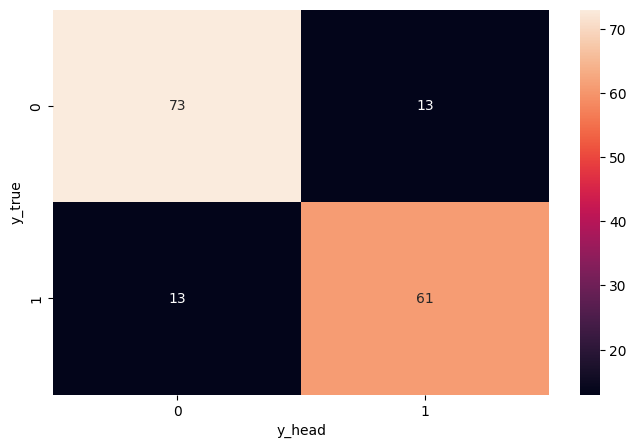

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, predicted), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

In [23]:
import string
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
import re

In [24]:
data_clean = pd.read_csv('tweetbersih.csv', encoding='latin1')
data_clean.head()

,Ã¯Â»Â¿Id,Sentiment,Acara TV,Jumlah Retweet,Text Tweet
0,1,positive,HitamPutihTransTV,12,undang nshanijkt hitamputih menang ssk jkt mj...
1,2,positive,HitamPutihTransTV,6,selamat buka puasa moga amal ibadah ni terima ...
2,3,positive,HitamPutihTransTV,9,nih trans hitam putih dpt harga norwegia hita...
3,4,positive,HitamPutihTransTV,2,selamat ya mas adietaufan masuk hitamputih
4,5,positive,HitamPutihTransTV,1,asiknya nonton hitam putih trans


In [25]:
data_clean = data_clean.astype({'Sentiment' : 'category'})
data_clean = data_clean.astype({'Text Tweet' : 'string'})
data_clean.dtypes

Ã¯Â»Â¿Id                   int64
Sentiment               category
Acara TV                  object
Jumlah Retweet             int64
Text Tweet        string[python]
dtype: object

In [26]:
# PROSES TF IDF
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data_clean['Text Tweet'].astype('U'))

tf = TfidfVectorizer()
text_tf = tf.fit_transform(data_clean['Text Tweet'].astype('U'))
print(text_tf)

  (0, 1258)	0.4584778253346029
  (0, 839)	0.33167017560927725
  (0, 420)	0.23735328980117673
  (0, 730)	0.2951834235647939
  (0, 1124)	0.33167017560927725
  (0, 513)	0.33167017560927725
  (0, 765)	0.33167017560927725
  (0, 644)	0.33167017560927725
  (0, 947)	0.3103267938901435
  (1, 420)	0.2646449306701579
  (1, 1063)	0.3053270462341768
  (1, 200)	0.3160278423296202
  (1, 955)	0.3698066738531513
  (1, 767)	0.2599470731660687
  (1, 46)	0.3698066738531513
  (1, 437)	0.32912455828913234
  (1, 827)	0.3160278423296202
  (1, 1191)	0.28152953417922116
  (1, 44)	0.32912455828913234
  (2, 420)	0.33008871979060583
  (2, 828)	0.34343570540994356
  (2, 1218)	0.2707239681701616
  (2, 419)	0.24195099220651967
  (2, 963)	0.2457059560988738
  (2, 297)	0.4612558088042518
  :	:
  (397, 837)	0.20397057223723644
  (397, 336)	0.21461390229394545
  (397, 659)	0.28391200684967444
  (397, 164)	0.28391200684967444
  (397, 224)	0.3315656503414458
  (397, 1225)	0.29258173432561235
  (397, 715)	0.1792597554791937

In [27]:
# Import cosine_similarity metrics
from sklearn.metrics.pairwise import cosine_similarity
# compute similarity using cosine similarity
cos_sim=cosine_similarity(text_tf, text_tf)

print(cos_sim)

[[1.         0.06281434 0.07834764 ... 0.         0.         0.        ]
 [0.06281434 1.         0.08735631 ... 0.         0.         0.        ]
 [0.07834764 0.08735631 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.03394809 0.17210767]
 [0.         0.         0.         ... 0.03394809 1.         0.03430613]
 [0.         0.         0.         ... 0.17210767 0.03430613 1.        ]]


In [28]:
# splitting data menjadi 30 dan 70
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cos_sim, data_clean['Sentiment'], test_size=0.2, random_state=33)
print(X_test)
print(y_test)

[[0.         0.14658335 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.04731451 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.08143659 0.        ]
 [0.         0.         0.         ... 0.04139428 0.04373106 0.04183085]
 [0.         0.         0.         ... 0.         0.         0.        ]]
239    positive
322    positive
375    negative
90     negative
70     negative
         ...   
368    negative
204    positive
293    negative
338    positive
292    negative
Name: Sentiment, Length: 80, dtype: category
Categories (2, object): ['negative', 'positive']


In [29]:
# perform algoritma 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(X_train, y_train)
predicted = clf.predict(X_test)
print("knn Accuracy:" , accuracy_score(y_test,predicted))
print("knn Precision:" , precision_score(y_test,predicted, average="binary", pos_label="positive"))
print("knn Recall:" , recall_score(y_test,predicted, average="binary", pos_label="positive"))
print("knn f1_score:" , f1_score(y_test,predicted, average="binary", pos_label="positive"))

print(f'confusion matrix:\n {confusion_matrix(y_test, predicted)}')
print('===============================================\n')
print(classification_report(y_test, predicted, zero_division=0))

knn Accuracy: 0.725
knn Precision: 0.7142857142857143
knn Recall: 0.75
knn f1_score: 0.7317073170731707
confusion matrix:
 [[28 12]
 [10 30]]

              precision    recall  f1-score   support

    negative       0.74      0.70      0.72        40
    positive       0.71      0.75      0.73        40

    accuracy                           0.72        80
   macro avg       0.73      0.72      0.72        80
weighted avg       0.73      0.72      0.72        80



In [30]:
tn, fp, fn, tp = confusion_matrix(y_test, predicted).ravel()
tn, fp, fn, tp

(28, 12, 10, 30)

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
cross_val_score(knn, cos_sim, data_clean['Sentiment'], cv=10)

array([0.8  , 0.85 , 0.8  , 0.75 , 0.725, 0.8  , 0.75 , 0.85 , 0.625,
       0.85 ])

In [32]:
cross_val_score(knn, cos_sim, data_clean['Sentiment'], cv=10).mean()

0.78

<center>

### **Model Serialisasi**
</center>

**membuat model**

In [40]:
# X_train harus berupa daftar string (dokumen teks)
X_train, X_test, y_train, y_test = train_test_split(data_clean['Text Tweet'], data_clean['Sentiment'], test_size=0.2, random_state=33)


In [41]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier

# Membuat pipeline dengan dua langkah: TF-IDF Vectorizer dan KNN Classifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('knn', KNeighborsClassifier(n_neighbors=7))
])

# Melatih pipeline dengan data latih
pipeline.fit(X_train, y_train)


Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('knn', KNeighborsClassifier(n_neighbors=7))])

In [53]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
import pickle

# Membuat pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('knn', KNeighborsClassifier(n_neighbors=7))
])

# Latih model
pipeline.fit(X_train, y_train)

# Simpan pipeline yang telah dilatih
with open('tweettayangantv_sentimen.pkl', 'wb') as file:
    pickle.dump(pipeline, file)


**Coba model**

In [43]:
prediction = pipeline.predict(["hitam putih keren"])

if prediction == 'positive':  
    print("Review positif")
else:
    print("Review negatif")


Review positif


In [48]:
new_review = []
pred_sentiment = []

while True:
    # Meminta input ulasan tv
    review = input("Ketikan review untuk tayangan tv - ")

    if review.lower() == 'berhenti!':  # Menghentikan loop jika input adalah 'berhenti'
        print("Terimakasih ulasannyaa:)")
        break
    else:
        prediction = pipeline.predict([review])

        # Menyesuaikan hasil prediksi sesuai dengan label sentimen ('positive' atau 'negative')
        if prediction == 'positive':  
            result = 'Positive'
            print("Hasil : Review positif\n")
        else:
            result = 'Negative'
            print("Hasil : Review negatif\n")
    
    new_review.append(review)  # Menyimpan ulasan baru
    pred_sentiment.append(result)  # Menyimpan hasil prediksi sentimen


Hasil : Review negatif

Hasil : Review positif

Terimakasih ulasannyaa:)


In [49]:
Results_Summary = pd.DataFrame(
    {'New Review': new_review,
     'Sentiment': pred_sentiment,
    })

Results_Summary.to_csv("contohulasan.tsv", sep='\t', encoding='UTF-8', index=False)
Results_Summary

,New Review,Sentiment
0,kickandi buruk,Negative
1,hitamputih menarik sekali,Positive


**Mengubah kolom Text Tweet menjadi .txt**

In [33]:
import pandas as pd

# Baca file CSV yang berisi kolom tweet
df = pd.read_csv('tweetbersih.csv')  

# Pastikan kolom tweet ada dalam file CSV
if 'Text Tweet' in df.columns:
    # Simpan kolom 'tweet' ke dalam file tweetbersih.txt
    df['Text Tweet'].to_csv('tweetbersih.txt', index=False, header=False)
else:
    print("Kolom 'Text Tweet' tidak ditemukan dalam file CSV.")